<a href="https://colab.research.google.com/github/SushiFou/ML-Business-Case-Project/blob/main/notebooks/Random_Forest_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center"><b> Machine Learning Business Case Project </b></div>
---
<div align="center">Authors : Maxime Lepeytre | Soumaya Sabry | Alexandre Zajac | Olivier Boivin | Yann Kervella


<center>
<img src="https://github.com/SushiFou/ML-Business-Case-Project/blob/main/cover_image_tech.jpg?raw=1" width="800px"/>
</center>
</div>

<div align="center"><font color='red' size='12'> DON'T FORGET TO COMMIT CHANGES ON GITHUB FOLKS ! Good luck ! <font></div>

## Context

Vous êtes consultant data scientist dans une grande entreprise de conseil
française. Votre client est une entreprise qui génère beaucoup de données
mais pour le moment aucun modèle de Machine Learning n'a été mis en
place pour les exploiter. Elle a donc naturellement fait appel à vous.

L’entreprise en question exploite plus de 3 000 magasins dans 7 pays
européens. Actuellement, les directeurs de magasin sont chargés d’estimer
leurs ventes quotidiennes jusqu'à six semaines à l'avance. Les ventes des
magasins sont influencées par de nombreux facteurs, notamment les
promotions, la concurrence, les vacances scolaires, la saisonnalité et la
localité. Avec des milliers de gestionnaires individuels prédisant les ventes
en fonction de leur situation particulière, la précision des résultats peut
être très variable.

Avec votre équipe de consultant data scientists, vous récupérez les
données disponibles et allez mener un projet complet pour les exploiter et
répondre à la problématique. Vous devez préparer et soutenir, pour le 21
janvier 2021, un rendu sous forme de slides qui tirera les conclusions de
votre travail, incluant une démonstration présentant les résultats du
modèle de Machine Learning de manière visuelle à destination des
utilisateur finaux. Vous aurez 12 minutes pour présenter votre travail à
votre donneur d’ordre client.

## Requirements


In [107]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.17 s (started: 2021-01-19 15:09:29 +00:00)


In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

time: 1.74 ms (started: 2021-01-19 15:09:31 +00:00)


In [109]:
# Graphical settings
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          'axes.labelsize' : 15,
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "axes.titlecolor": "black", 
          'figure.figsize': [20, 8], 
          'axes.prop_cycle': plt.cycler(color=color_list), 
          'figure.dpi' : 75, 
          'legend.fontsize': 10,
          'font.size': 15 
          }
plt.rcParams.update(params)

time: 5.1 ms (started: 2021-01-19 15:09:31 +00:00)


## Data Importation

### gdown if using colab

In [110]:
!gdown "https://drive.google.com/uc?id=1IHr_vKHZ0P0lUIAksJ9joRLUoUtZdDSY"

Downloading...
From: https://drive.google.com/uc?id=1IHr_vKHZ0P0lUIAksJ9joRLUoUtZdDSY
To: /content/store.csv
100% 45.0k/45.0k [00:00<00:00, 63.7MB/s]
time: 751 ms (started: 2021-01-19 15:09:31 +00:00)


In [111]:
!gdown "https://drive.google.com/uc?id=17ur-ILBNAZDgjpqgPU1XBLYSIXc5cn5d"

Downloading...
From: https://drive.google.com/uc?id=17ur-ILBNAZDgjpqgPU1XBLYSIXc5cn5d
To: /content/test.csv
100% 1.43M/1.43M [00:00<00:00, 94.3MB/s]
time: 757 ms (started: 2021-01-19 15:09:32 +00:00)


In [112]:
!gdown "https://drive.google.com/uc?id=1kx5sSTcRj4aVS8KZgSCcdo9-5i1axh5n"

Downloading...
From: https://drive.google.com/uc?id=1kx5sSTcRj4aVS8KZgSCcdo9-5i1axh5n
To: /content/train.csv
38.1MB [00:00, 91.8MB/s]
time: 2.26 s (started: 2021-01-19 15:09:33 +00:00)


In [113]:
!gdown "https://drive.google.com/uc?id=10p7JyO2DNkWbMRZoMNVPmipy1msZpBEV"

Downloading...
From: https://drive.google.com/uc?id=10p7JyO2DNkWbMRZoMNVPmipy1msZpBEV
To: /content/variables.txt
100% 1.58k/1.58k [00:00<00:00, 1.38MB/s]
time: 858 ms (started: 2021-01-19 15:09:35 +00:00)


## Data Exploration

In [114]:
f = open("variables.txt", "r")
print(f.read())

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set
Store - a unique Id for each store
Sales - the turnover for any given day
Customers - the number of customers on a given day
Open - an indicator for whether the store was open: 0 = closed, 1 = open
StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
StoreType - differentiates between 4 different store models: a, b, c, d
Assortment - describes an assortment level: a = basic, b = extra, c = extended
CompetitionDistance - distance in meters to the nearest competitor store
CompetitionOpenSince[Month/Year] - gives the approximate year and month of t

In [115]:
store_data = pd.read_csv('store.csv')
print(f'Dataframe shape : rows = {store_data.shape[0]}, columns = {store_data.shape[1]}')
store_data.head()

Dataframe shape : rows = 1115, columns = 10


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


time: 29.7 ms (started: 2021-01-19 15:09:36 +00:00)


In [116]:
train_data = pd.read_csv('train.csv', low_memory = False)
print(f'Dataframe shape : rows = {train_data.shape[0]}, columns = {train_data.shape[1]}')
train_data.head()

Dataframe shape : rows = 1017209, columns = 9


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


time: 658 ms (started: 2021-01-19 15:09:36 +00:00)


In [117]:
test_data = pd.read_csv('test.csv')
print(f'Dataframe shape : rows = {test_data.shape[0]}, columns = {test_data.shape[1]}')
test_data.head()

Dataframe shape : rows = 41088, columns = 8


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


time: 45.4 ms (started: 2021-01-19 15:09:37 +00:00)


### Check Nan Values

In [118]:
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

time: 5.98 ms (started: 2021-01-19 15:09:37 +00:00)


Only 3 Nan values in competition distance 

A lot of nan due to no competition registered for some tuples

In [119]:
train_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

time: 98.8 ms (started: 2021-01-19 15:09:37 +00:00)


In [120]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].mean(), inplace = True)

time: 2.64 ms (started: 2021-01-19 15:09:37 +00:00)


In [121]:
store_data.fillna(-1, inplace=True)

time: 3.14 ms (started: 2021-01-19 15:09:37 +00:00)


In [122]:
store_data.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

time: 6.64 ms (started: 2021-01-19 15:09:37 +00:00)


### Check Outliers

In [123]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.00000
mean,558.00000,5404.901079,4.613453,1370.621525,0.512108,11.595516,1029.75157
std,322.01708,7652.849306,4.659540,935.933356,0.500078,15.925223,1006.53886
min,1.00000,20.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.00000
25%,279.50000,720.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.00000
50%,558.00000,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.00000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.00000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.00000


time: 36.9 ms (started: 2021-01-19 15:09:37 +00:00)


Let's try to process the CompetitionDistance Outliers

In [124]:
from scipy import stats
store_data['CD_zscore'] = np.abs(stats.zscore(store_data['CompetitionDistance'].to_numpy()))
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CD_zscore
0,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,0.540551
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0.632061
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1.140623
3,4,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,-1,0.625525
4,5,a,a,29910.0,4.0,2015.0,0,-1.0,-1.0,-1,3.203525


time: 25.7 ms (started: 2021-01-19 15:09:37 +00:00)


In [125]:
store_data_cleaned = store_data[store_data['CD_zscore'] < 3]
store_data_cleaned.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,CD_zscore
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,559.150046,4725.402290,4.617566,1363.264410,0.522415,11.849039,1050.498628,0.608184
std,322.261812,5825.426321,4.683200,938.761871,0.499726,15.983167,1005.830924,0.466511
min,1.000000,20.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
25%,279.000000,700.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.349713
50%,560.000000,2280.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000,0.553650
75%,839.000000,6360.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000,0.673895
max,1115.000000,27650.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,2.908078


time: 36.4 ms (started: 2021-01-19 15:09:37 +00:00)


In [126]:
store_data = store_data_cleaned.drop(columns='CD_zscore')
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,-1.0,-1.0,-1
5,6,a,a,310.0,12.0,2013.0,0,-1.0,-1.0,-1


time: 26 ms (started: 2021-01-19 15:09:37 +00:00)


In [127]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


time: 195 ms (started: 2021-01-19 15:09:37 +00:00)


## Model

In [128]:
combined_data = store_data.merge(train_data, on=['Store'])
combined_data.set_index('Date', inplace=True)
combined_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,,,,,,,,,,
2015-07-31,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,5,5263,555,1,1,0,1
2015-07-30,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,4,5020,546,1,1,0,1
2015-07-29,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,3,4782,523,1,1,0,1
2015-07-28,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,2,5011,560,1,1,0,1
2015-07-27,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,-1,1,6102,612,1,1,0,1


time: 515 ms (started: 2021-01-19 15:09:37 +00:00)


In [129]:
combined_data.reset_index(level=0, inplace=True)
model_data = combined_data.drop(columns = ['PromoInterval'])

time: 185 ms (started: 2021-01-19 15:09:38 +00:00)


### X & y Separation

In [130]:
y = model_data[['Date', 'Store', 'Sales']]
X = model_data.drop(columns='Sales').copy()
X['Date'] = pd.to_datetime(X['Date'])
y['Date'] = pd.to_datetime(y['Date'])

time: 387 ms (started: 2021-01-19 15:09:38 +00:00)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [131]:
date_ref = pd.to_datetime(X.iloc[0, 0]) - pd.to_timedelta(42, unit='d')
date_ref

Timestamp('2015-06-19 00:00:00')

time: 5.27 ms (started: 2021-01-19 15:09:38 +00:00)


In [132]:
X_train = X[X['Date'] <= date_ref]
X_test = X[X['Date'] > date_ref]
y_train = y[y['Date'] <= date_ref]
y_test = y[y['Date'] > date_ref]
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

time: 155 ms (started: 2021-01-19 15:09:38 +00:00)


In [133]:
X_train.head()

,Date,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2015-06-19,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,5,487,1,1,0,0
1,2015-06-18,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,4,498,1,1,0,0
2,2015-06-17,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,3,476,1,1,0,0
3,2015-06-16,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,2,503,1,1,0,0
4,2015-06-15,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,1,586,1,1,0,0


time: 28.2 ms (started: 2021-01-19 15:09:38 +00:00)


In [134]:
X_test.head()

,Date,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2015-07-31,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,5,555,1,1,0,1
1,2015-07-30,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,4,546,1,1,0,1
2,2015-07-29,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,3,523,1,1,0,1
3,2015-07-28,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,2,560,1,1,0,1
4,2015-07-27,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,1,612,1,1,0,1


time: 30.4 ms (started: 2021-01-19 15:09:38 +00:00)


In [135]:
y_train.head()

,Date,Store,Sales
0,2015-06-19,1,4202
1,2015-06-18,1,4645
2,2015-06-17,1,4000
3,2015-06-16,1,4852
4,2015-06-15,1,5518


time: 12.7 ms (started: 2021-01-19 15:09:39 +00:00)


In [136]:
y_test.head()

,Date,Store,Sales
0,2015-07-31,1,5263
1,2015-07-30,1,5020
2,2015-07-29,1,4782
3,2015-07-28,1,5011
4,2015-07-27,1,6102


time: 13.8 ms (started: 2021-01-19 15:09:39 +00:00)


In [137]:
print(X_train.shape)
print(y_train.shape)

(950579, 16)
(950579, 3)
time: 1.28 ms (started: 2021-01-19 15:09:39 +00:00)


### Encoding

In [138]:
def one_hot_encoding(X):
  encoder = OneHotEncoder(sparse=False)
  features = ['StoreType', 'Assortment', 'StateHoliday']
  X_encoded = pd.DataFrame(encoder.fit_transform(X[features]))
  X_encoded.columns = encoder.get_feature_names(features)
  tmp = X.drop(features, axis=1)
  X_encoded = pd.concat([tmp, X_encoded], axis=1)
  return X_encoded

time: 4.36 ms (started: 2021-01-19 15:09:39 +00:00)


In [139]:
X_train_encoded = one_hot_encoding(X_train)
X_train_encoded.head()

,Date,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Customers,Open,Promo,SchoolHoliday,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,2015-06-19,1,1270.0,9.0,2008.0,0,-1.0,-1.0,5,487,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2015-06-18,1,1270.0,9.0,2008.0,0,-1.0,-1.0,4,498,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2015-06-17,1,1270.0,9.0,2008.0,0,-1.0,-1.0,3,476,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2015-06-16,1,1270.0,9.0,2008.0,0,-1.0,-1.0,2,503,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2015-06-15,1,1270.0,9.0,2008.0,0,-1.0,-1.0,1,586,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


time: 834 ms (started: 2021-01-19 15:09:39 +00:00)


In [140]:
X_test_encoded = one_hot_encoding(X_test)
X_test_encoded.head()

,Date,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Customers,Open,Promo,SchoolHoliday,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0
0,2015-07-31,1,1270.0,9.0,2008.0,0,-1.0,-1.0,5,555,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2015-07-30,1,1270.0,9.0,2008.0,0,-1.0,-1.0,4,546,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2015-07-29,1,1270.0,9.0,2008.0,0,-1.0,-1.0,3,523,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,2015-07-28,1,1270.0,9.0,2008.0,0,-1.0,-1.0,2,560,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,2015-07-27,1,1270.0,9.0,2008.0,0,-1.0,-1.0,1,612,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


time: 78.9 ms (started: 2021-01-19 15:09:39 +00:00)


In [141]:
X_train_encoded.set_index(['Date'], inplace=True)
X_test_encoded.set_index(['Date'], inplace=True)
y_train.set_index(['Date'], inplace=True)
y_test.set_index(['Date'], inplace=True)

time: 7.06 ms (started: 2021-01-19 15:09:39 +00:00)


In [142]:
X_train_encoded.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Customers,Open,Promo,SchoolHoliday,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-06-19,1,1270.0,9.0,2008.0,0,-1.0,-1.0,5,487,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-06-18,1,1270.0,9.0,2008.0,0,-1.0,-1.0,4,498,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-06-17,1,1270.0,9.0,2008.0,0,-1.0,-1.0,3,476,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-06-16,1,1270.0,9.0,2008.0,0,-1.0,-1.0,2,503,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-06-15,1,1270.0,9.0,2008.0,0,-1.0,-1.0,1,586,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


time: 43.5 ms (started: 2021-01-19 15:09:40 +00:00)


In [143]:
# Create encoded columns in the test sets that are missing.
for column in np.asarray(X_train_encoded.columns):
  if column not in np.asarray(X_test_encoded.columns):
    X_test_encoded[column] = np.zeros(X_test_encoded.shape[0])

time: 6.19 ms (started: 2021-01-19 15:09:40 +00:00)


In [144]:
X_test_encoded.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Customers,Open,Promo,SchoolHoliday,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,1270.0,9.0,2008.0,0,-1.0,-1.0,5,555,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-07-30,1,1270.0,9.0,2008.0,0,-1.0,-1.0,4,546,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-07-29,1,1270.0,9.0,2008.0,0,-1.0,-1.0,3,523,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-07-28,1,1270.0,9.0,2008.0,0,-1.0,-1.0,2,560,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-07-27,1,1270.0,9.0,2008.0,0,-1.0,-1.0,1,612,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


time: 44.5 ms (started: 2021-01-19 15:09:40 +00:00)


### Model Training & Prediction

In [145]:
model = RandomForestRegressor(n_estimators = 20, n_jobs=-1)

time: 908 µs (started: 2021-01-19 15:09:40 +00:00)


In [146]:
model.fit(X_train_encoded[:(1115*250)], y_train['Sales'][:(1115*250)],)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

time: 14.6 s (started: 2021-01-19 15:09:40 +00:00)


In [147]:
y_pred = model.predict(X_test_encoded)

time: 216 ms (started: 2021-01-19 15:09:54 +00:00)


In [148]:
mean_absolute_error(y_pred, y_test['Sales'])

771.1080408576343

time: 7.03 ms (started: 2021-01-19 15:09:54 +00:00)


In [149]:
np.mean(y_test)

Store     559.150046
Sales    5998.447719
dtype: float64

time: 5.14 ms (started: 2021-01-19 15:09:54 +00:00)


In [150]:
y_test.head()

,Store,Sales
Date,,
2015-07-31,1,5263
2015-07-30,1,5020
2015-07-29,1,4782
2015-07-28,1,5011
2015-07-27,1,6102


time: 10.1 ms (started: 2021-01-19 15:09:54 +00:00)


In [151]:
y_test['Pred'] = y_pred
y_test.reset_index(inplace=True)
y_test['Date'] = pd.to_datetime(y_test['Date'])
y_test.set_index('Date', inplace=True)
y_test.head()

,Store,Sales,Pred
Date,,,
2015-07-31,1,5263,4863.8500
2015-07-30,1,5020,4729.3500
2015-07-29,1,4782,4650.8625
2015-07-28,1,5011,4767.8500
2015-07-27,1,6102,5493.9500


time: 29 ms (started: 2021-01-19 15:09:54 +00:00)


In [152]:
y_train

,Store,Sales
Date,,
2015-06-19,1,4202
2015-06-18,1,4645
2015-06-17,1,4000
2015-06-16,1,4852
2015-06-15,1,5518
...,...,...
2013-01-05,1115,4771
2013-01-04,1115,4540
2013-01-03,1115,4297


time: 12.5 ms (started: 2021-01-19 15:09:55 +00:00)


In [153]:
test = y_train

time: 758 µs (started: 2021-01-19 15:09:55 +00:00)


In [154]:
test.head()

,Store,Sales
Date,,
2015-06-19,1,4202
2015-06-18,1,4645
2015-06-17,1,4000
2015-06-16,1,4852
2015-06-15,1,5518


time: 11.7 ms (started: 2021-01-19 15:09:55 +00:00)


In [155]:
def get_forecast_of_shop(ID_shop):
  fig, ax = plt.subplots(len(ID_shop), figsize=(20, 8*len(ID_shop)))
  index = 0
  for ID_shop in ID_shop:
    data_init = test[test['Store']==ID_shop][:50].copy()
    data = y_test[y_test['Store']==ID_shop].copy()
    link = pd.DataFrame({'Date': pd.to_datetime("2015-06-20"), 'Store': ID_shop, 'Sales': data.loc["2015-06-20", 'Pred']})
    link.set_index('Date', inplace=True)
    link = link.astype(int)
    data_init = pd.concat([link, data_init])
    ax[index].set_title('Forecast of the shop n° ' + str(ID_shop))
    ax[index].plot(data_init['Sales'], label = 'Past Values')
    ax[index].plot(data['Pred'], label = 'Predictions')
    ax[index].plot(data['Sales'], label = 'Real Values')
    ax[index].axvline(pd.to_datetime("2015-06-20"), linestyle="--", color='#47DBCD')
    ax[index].axvline(pd.to_datetime("2015-07-31"), linestyle="--", color='#47DBCD')
    ax[index].axvspan(pd.to_datetime("2015-06-20"), pd.to_datetime("2015-07-31"), facecolor='#F3A0F2', alpha=0.3)
    ax[index].grid(True, color = 'black', linestyle='-', linewidth=0.2)
    ax[index].legend(loc="upper left")
    ax[index].patch.set_alpha(0)
    index+=1
  fig.show()

time: 21.9 ms (started: 2021-01-19 15:09:55 +00:00)


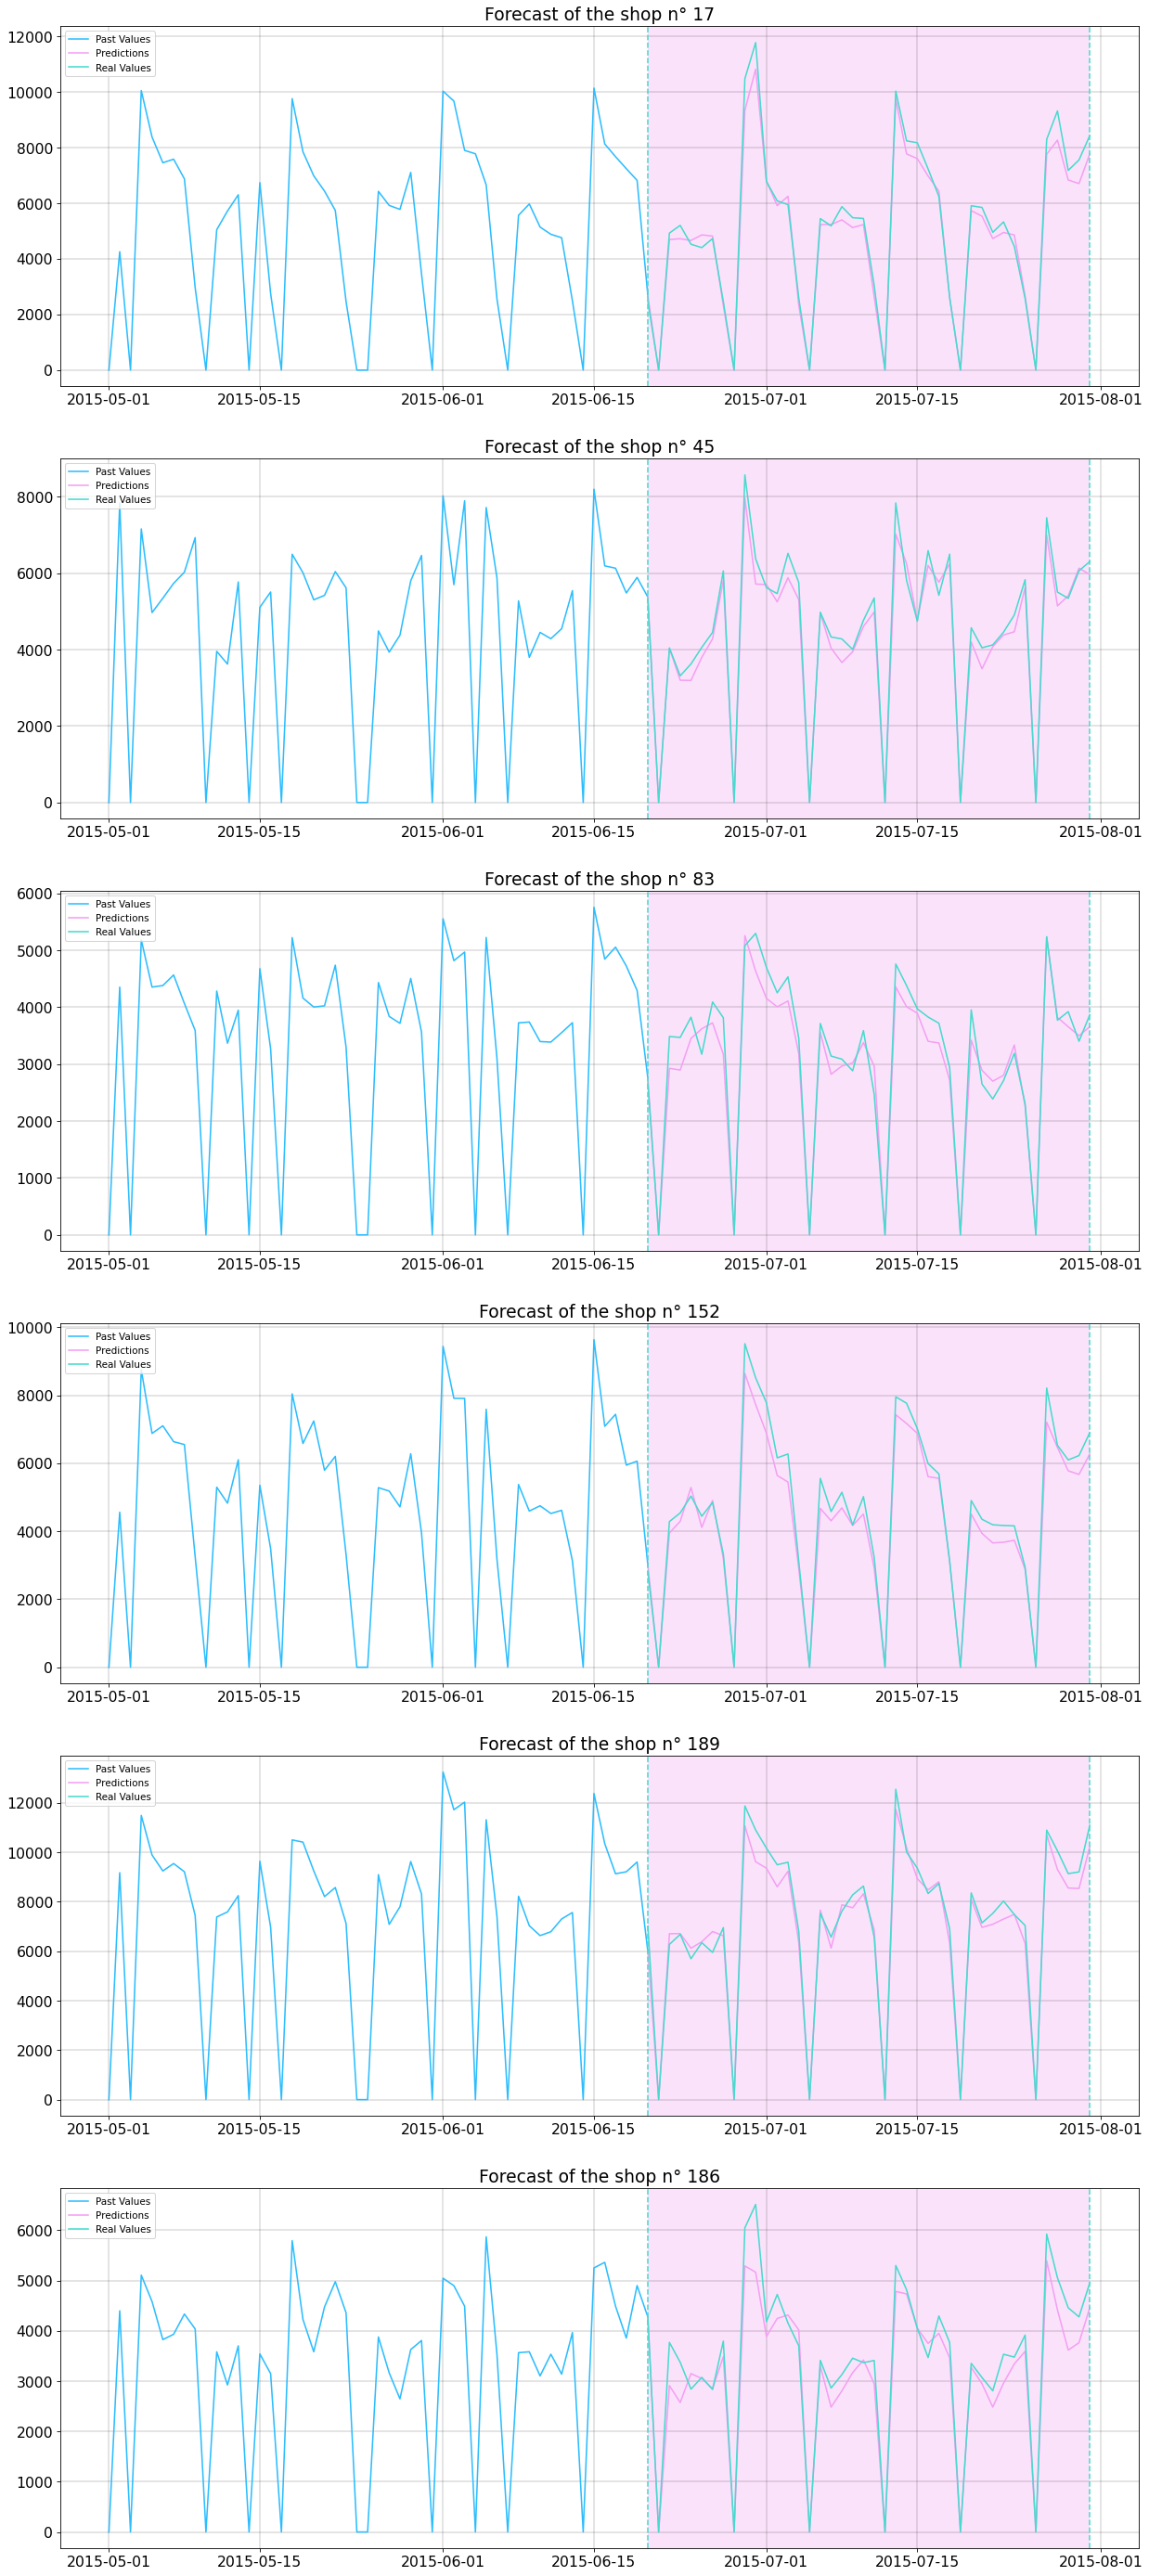

time: 1.62 s (started: 2021-01-19 15:09:55 +00:00)


In [156]:
get_forecast_of_shop([17,45,83,152,189,186])

### Saving Model

In [157]:
import pickle

time: 819 µs (started: 2021-01-19 15:09:56 +00:00)


In [158]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

time: 1.38 s (started: 2021-01-19 15:09:56 +00:00)


In [159]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_encoded, y_test['Sales'])
print(result)

0.8873992344511523
time: 517 ms (started: 2021-01-19 15:09:58 +00:00)


In [160]:
y_pred_loaded = loaded_model.predict(X_test_encoded)

time: 212 ms (started: 2021-01-19 15:09:58 +00:00)


In [161]:
mean_absolute_error(y_pred_loaded, y_test['Sales'])

771.1080408576343

time: 4.75 ms (started: 2021-01-19 15:09:58 +00:00)


### Model Hyperparameters Tuning - GridSearchCV

In [162]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
time: 12.5 ms (started: 2021-01-19 15:09:58 +00:00)


In [163]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=10, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train_encoded[:5000],y_train[:5000])

time: 3.72 ms (started: 2021-01-19 15:09:58 +00:00)


In [164]:
#rf_random.best_params_

time: 795 µs (started: 2021-01-19 15:09:58 +00:00)


### Forecast of the test.csv

In [165]:
test_data = pd.read_csv('test.csv', index_col=0)
test_data

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
Id,,,,,,,
1,1,4,2015-09-17,1.0,1,0,0
2,3,4,2015-09-17,1.0,1,0,0
3,7,4,2015-09-17,1.0,1,0,0
4,8,4,2015-09-17,1.0,1,0,0
5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...
41084,1111,6,2015-08-01,1.0,0,0,0
41085,1112,6,2015-08-01,1.0,0,0,0
41086,1113,6,2015-08-01,1.0,0,0,0


time: 53.7 ms (started: 2021-01-19 15:09:58 +00:00)


In [166]:
combined_test_data = store_data.merge(test_data, on=['Store'])
combined_test_data.drop(columns = 'PromoInterval', inplace=True)
combined_test_data.set_index('Date', inplace=True)
combined_test_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,,,,,,,
2015-09-17,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,4,1.0,1,0,0
2015-09-16,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,3,1.0,1,0,0
2015-09-15,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,2,1.0,1,0,0
2015-09-14,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,1,1.0,1,0,0
2015-09-13,1,c,a,1270.0,9.0,2008.0,0,-1.0,-1.0,7,0.0,0,0,0


time: 49.8 ms (started: 2021-01-19 15:09:58 +00:00)


In [167]:
combined_test_data.reset_index(level = 0, drop=False, inplace=True)
combined_test_data_encoded = one_hot_encoding(combined_test_data)
combined_test_data_encoded.head()

,Date,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Open,Promo,SchoolHoliday,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a
0,2015-09-17,1,1270.0,9.0,2008.0,0,-1.0,-1.0,4,1.0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2015-09-16,1,1270.0,9.0,2008.0,0,-1.0,-1.0,3,1.0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2015-09-15,1,1270.0,9.0,2008.0,0,-1.0,-1.0,2,1.0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2015-09-14,1,1270.0,9.0,2008.0,0,-1.0,-1.0,1,1.0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2015-09-13,1,1270.0,9.0,2008.0,0,-1.0,-1.0,7,0.0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


time: 76 ms (started: 2021-01-19 15:09:59 +00:00)


In [168]:
combined_test_data_encoded.isna().sum()

Date                          0
Store                         0
CompetitionDistance           0
CompetitionOpenSinceMonth     0
CompetitionOpenSinceYear      0
Promo2                        0
Promo2SinceWeek               0
Promo2SinceYear               0
DayOfWeek                     0
Open                         11
Promo                         0
SchoolHoliday                 0
StoreType_a                   0
StoreType_b                   0
StoreType_c                   0
StoreType_d                   0
Assortment_a                  0
Assortment_b                  0
Assortment_c                  0
StateHoliday_0                0
StateHoliday_a                0
dtype: int64

time: 11.5 ms (started: 2021-01-19 15:09:59 +00:00)


In [169]:
combined_test_data_encoded.dropna(inplace=True)

time: 17.5 ms (started: 2021-01-19 15:09:59 +00:00)


In [170]:
forecasts = combined_test_data_encoded[['Date', 'Store']]

time: 6.15 ms (started: 2021-01-19 15:09:59 +00:00)


In [171]:
# Create encoded columns in the test sets that are missing.
for column in np.asarray(X_train_encoded.columns):
  if column not in np.asarray(combined_test_data_encoded.columns):
    combined_test_data_encoded[column] = np.zeros(combined_test_data_encoded.shape[0])

time: 6.35 ms (started: 2021-01-19 15:09:59 +00:00)


In [172]:
X_train_encoded.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Customers,Open,Promo,SchoolHoliday,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-06-19,1,1270.0,9.0,2008.0,0,-1.0,-1.0,5,487,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-06-18,1,1270.0,9.0,2008.0,0,-1.0,-1.0,4,498,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-06-17,1,1270.0,9.0,2008.0,0,-1.0,-1.0,3,476,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-06-16,1,1270.0,9.0,2008.0,0,-1.0,-1.0,2,503,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-06-15,1,1270.0,9.0,2008.0,0,-1.0,-1.0,1,586,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


time: 40.4 ms (started: 2021-01-19 15:09:59 +00:00)


In [173]:
combined_test_data_encoded.set_index('Date', inplace=True)
combined_test_data_encoded.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Open,Promo,SchoolHoliday,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,Customers,StateHoliday_b,StateHoliday_c
Date,,,,,,,,,,,,,,,,,,,,,,,
2015-09-17,1,1270.0,9.0,2008.0,0,-1.0,-1.0,4,1.0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-09-16,1,1270.0,9.0,2008.0,0,-1.0,-1.0,3,1.0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-09-15,1,1270.0,9.0,2008.0,0,-1.0,-1.0,2,1.0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-09-14,1,1270.0,9.0,2008.0,0,-1.0,-1.0,1,1.0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-09-13,1,1270.0,9.0,2008.0,0,-1.0,-1.0,7,0.0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


time: 44.6 ms (started: 2021-01-19 15:09:59 +00:00)


In [174]:
combined_test_data_encoded.drop(columns=['Customers'], inplace=True)
X_train_encoded.drop(columns=['Customers'], inplace=True)

time: 161 ms (started: 2021-01-19 15:09:59 +00:00)


In [175]:
model2 = RandomForestRegressor(n_estimators=20)

time: 1.05 ms (started: 2021-01-19 15:09:59 +00:00)


In [176]:
model2.fit(X_train_encoded[:(1115*250)], y_train['Sales'][:(1115*250)])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

time: 8.41 s (started: 2021-01-19 15:09:59 +00:00)


In [177]:
forecasts['Sales'] = model2.predict(combined_test_data_encoded)
forecasts['Date'] = pd.to_datetime(forecasts['Date'])
forecasts.set_index('Date', inplace=True)
forecasts.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Store,Sales
Date,,
2015-09-17,1,4955.957498
2015-09-16,1,5095.272223
2015-09-15,1,5375.039290
2015-09-14,1,5836.179664
2015-09-13,1,0.000000


time: 97.1 ms (started: 2021-01-19 15:10:07 +00:00)


In [178]:
test.head()

,Store,Sales
Date,,
2015-06-19,1,4202
2015-06-18,1,4645
2015-06-17,1,4000
2015-06-16,1,4852
2015-06-15,1,5518


time: 10.4 ms (started: 2021-01-19 15:10:07 +00:00)


In [179]:
y_test.head()

,Store,Sales,Pred
Date,,,
2015-07-31,1,5263,4863.8500
2015-07-30,1,5020,4729.3500
2015-07-29,1,4782,4650.8625
2015-07-28,1,5011,4767.8500
2015-07-27,1,6102,5493.9500


time: 12.6 ms (started: 2021-01-19 15:10:07 +00:00)


In [180]:
def get_forecast_of_shop_future(ID_shop):
  fig, ax = plt.subplots(len(ID_shop), figsize=(20, 8*len(ID_shop)))
  index = 0
  for ID_shop in ID_shop:
    data_init = test[test['Store']==ID_shop][:50].copy()
    data_init2 = y_test[y_test['Store']==ID_shop].copy()
    data = forecasts[forecasts['Store']==ID_shop].copy()
    test2 = pd.concat([data_init['Sales'], data_init2['Sales']]).reset_index(name='Sales')
    test2.set_index('Date', inplace=True)
    test2.sort_index(ascending=True, inplace=True)
    link = pd.DataFrame({'Date': pd.to_datetime("2015-08-01"), 'Store': ID_shop, 'Sales': data.loc["2015-08-01", 'Sales']})
    link.set_index('Date', inplace=True)
    link = link.astype(int)
    test2 = pd.concat([link, test2])
    test2.sort_index(ascending=True, inplace=True)
    ax[index].plot(test2)
    ax[index].plot(data['Sales'], label="Predicted value", linestyle="dashed", c='#47DBCD')
    ax[index].axvline(pd.to_datetime("2015-08-01"), linestyle="--", color='#47DBCD')
    ax[index].axvline(pd.to_datetime("2015-09-17"), linestyle="--", color='#47DBCD')
    ax[index].axvspan(pd.to_datetime("2015-08-01"), pd.to_datetime("2015-09-17"), facecolor='#F3A0F2', alpha=0.3)
    ax[index].set_title('Forecast of the shop n° ' + str(ID_shop))
    ax[index].grid(True, color = 'black', linestyle='-', linewidth=0.2)
    ax[index].patch.set_alpha(0)
    index+=1
  fig.show()

time: 23.3 ms (started: 2021-01-19 15:10:07 +00:00)


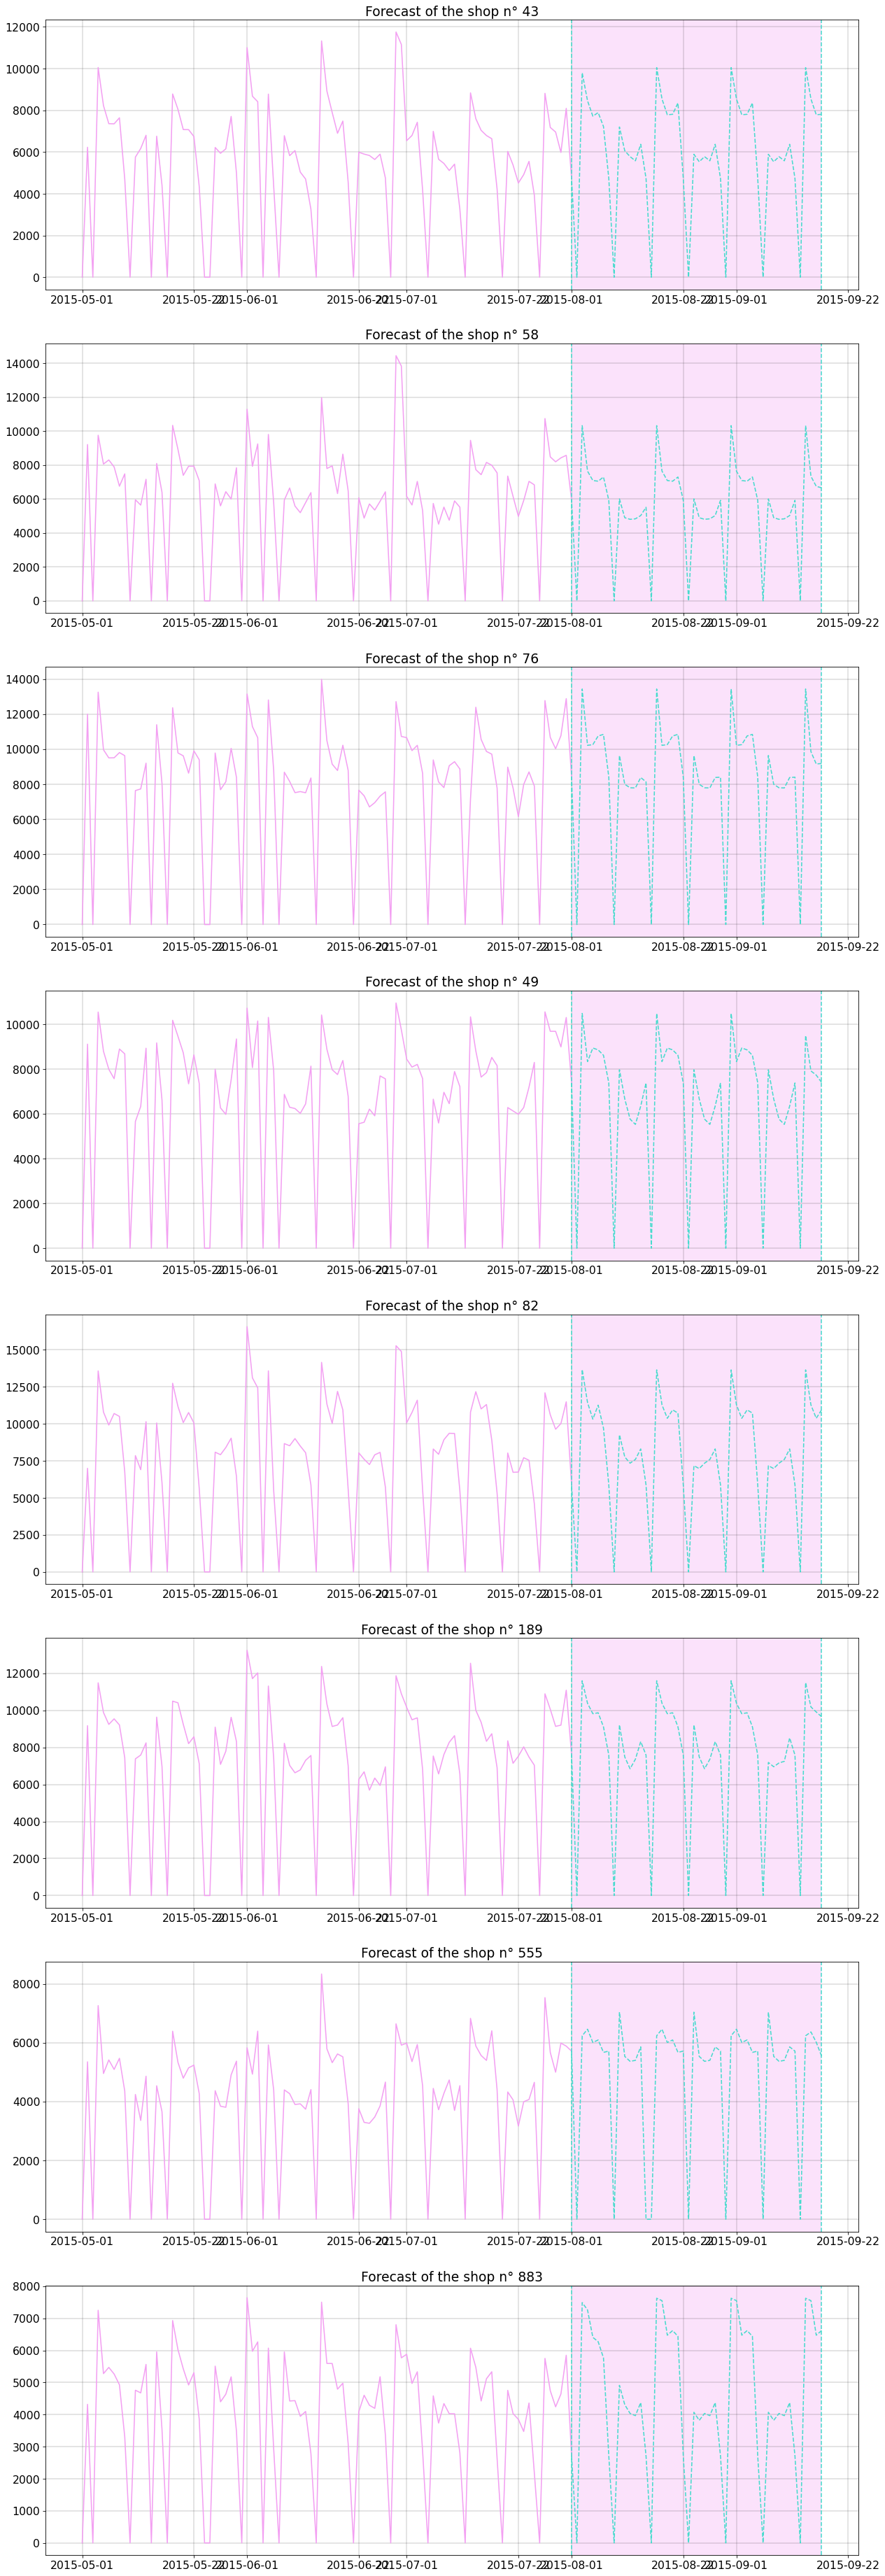

time: 2.16 s (started: 2021-01-19 15:10:08 +00:00)


In [181]:
get_forecast_of_shop_future([43, 58, 76, 49, 82, 189, 555, 883])